In [1]:
using Seismic

INFO: Loading help data...


In [2]:
# data and velocity model dimensions
nz = 750;
dz = 4;
oz = 0;
nmx = 875;
dmx = 8;
omx = 0;
nmy = 1;
dmy = 0;
omy = 0;
nt = 2000;
dt = 0.002;
ot = 0;
nsx = 69;
dsx = 100.0;
osx = 100.0;
nsy = 1;
dsy = 100.0;
osy = 0.0;
dhx = 8.0;
ohx = -3304.0;
dhy = 8.0;
ohy = 0.0;

In [3]:
# read velocity files
SegyToSeis("/Users/astanton/Downloads/vp_mig.rsf","vp","rsf");
vp,h_v = SeisRead("vp");
vp = reshape(vp,nz,nmx,nmy);
SegyToSeis("/Users/astanton/Downloads/vs_mig.rsf","vs","rsf");
vs,h_v = SeisRead("vs");
vs = reshape(vs,nz,nmx,nmy);
# set up headers in velocity files
h_v = Array(Header,nmx*nmy);
for imx = 1:nmx
for imy = 1:nmy
  h_v[(imx-1)*nmy + imy] = Seismic.InitSeisHeader();
  h_v[(imx-1)*nmy + imy].tracenum = (imx-1)*nmy + imy;
  h_v[(imx-1)*nmy + imy].n1 = nz;
  h_v[(imx-1)*nmy + imy].d1 = dz;
  h_v[(imx-1)*nmy + imy].mx = (imx-1)*dmx + omx;
  h_v[(imx-1)*nmy + imy].my = (imy-1)*dmy + omy;
  h_v[(imx-1)*nmy + imy].imx = imx-1;
  h_v[(imx-1)*nmy + imy].imy = imy-1;
end
end
SeisWrite("vp",vp[1:nz,:],h_v);
SeisWrite("vs",vs[1:nz,:],h_v);

nx=875
nt=750
nx=875
nt=750


In [4]:
# read velocity files
SegyToSeis("/Users/astanton/Downloads/vp_mig_raw.rsf","vp_raw","rsf");
vp_raw,h_v = SeisRead("vp_raw");
vp_raw = reshape(vp_raw,nz,nmx,nmy);
SegyToSeis("/Users/astanton/Downloads/vs_mig_raw.rsf","vs_raw","rsf");
vs_raw,h_v = SeisRead("vs_raw");
vs_raw = reshape(vs_raw,nz,nmx,nmy);
# set up headers in velocity files
h_v = Array(Header,nmx*nmy);
for imx = 1:nmx
for imy = 1:nmy
  h_v[(imx-1)*nmy + imy] = Seismic.InitSeisHeader();
  h_v[(imx-1)*nmy + imy].tracenum = (imx-1)*nmy + imy;
  h_v[(imx-1)*nmy + imy].n1 = nz;
  h_v[(imx-1)*nmy + imy].d1 = dz;
  h_v[(imx-1)*nmy + imy].mx = (imx-1)*dmx + omx;
  h_v[(imx-1)*nmy + imy].my = (imy-1)*dmy + omy;
  h_v[(imx-1)*nmy + imy].imx = imx-1;
  h_v[(imx-1)*nmy + imy].imy = imy-1;
end
end
SeisWrite("vp_raw",vp_raw[1:nz,:],h_v);
SeisWrite("vs_raw",vs_raw[1:nz,:],h_v);

nx=875
nt=750
nx=875
nt=750


In [5]:
# read data files
SegyToSeis("/Users/astanton/Downloads/dx.rsf","ux","rsf");
ux,h_d = SeisRead("ux");
SegyToSeis("/Users/astanton/Downloads/dz.rsf","uz","rsf");
uz,h_d = SeisRead("uz");
# set up headers in data files
h_d = Array(Header,nsx*nsy*nmx*nmy);
for isx = 1:nsx
for isy = 1:nsy
for imx = 1:nmx
for imy = 1:nmy
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy] = Seismic.InitSeisHeader();
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].tracenum = (isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].n1 = nt;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].d1 = dt;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].gx = (imx-1)*dmx + omx;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].gy = (imy-1)*dmy + omy;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].igx = imx-1;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].igy = imy-1;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].sx = (isx-1)*dsx + osx;
  h_d[(isx-1)*nsy*nmx*nmy + (isy-1)*nmx*nmy + (imx-1)*nmy + imy].sy = (isy-1)*dsy + osy;
end
end
end
end
SeisWrite("ux_raw1",ux[1:nt,:],h_d);
SeisWrite("uz_raw1",uz[1:nt,:],h_d);
SegyToSeis("/Users/astanton/Downloads/wav_resample.rsf","wav","rsf");
w,h_w = SeisRead("wav");
# set up headers in wavelet file
h_w = Array(Header,1);
h_w[1] = Seismic.InitSeisHeader();h_w[1].tracenum = 1;
h_w[1].n1 = nt;
h_w[1].d1 = dt;
SeisWrite("wav",w[:],h_w);

nx=60375
nt=2000
nx=60375
nt=2000
nx=1
nt=2000


In [18]:
# update geometry for d and bin to isx,isy,ihx,ihy
param = ["dsx"=> dsx, "dsy"=> dsy, "osx"=> osx, "osy"=> osy,
         "dhx"=>  dhx, "dhy"=>  dhy, "ohx"=> ohx, "ohy"=> ohy, 
         "gamma"=> 1, "ang"=> 90]
SeisGeometry("ux_raw1",param);
SeisGeometry("uz_raw1",param);
SeisSort("ux_raw1","ux_raw2",["isx","ihx"],false);
SeisSort("uz_raw1","uz_raw2",["isx","ihx"],false);
SeisWindow("ux_raw2","ux_raw3",["isx" "hx" "gx" "gy"],[50 -3304.0 0.0 0.0],[50 3304.0 6992.0 0.0])
SeisWindow("uz_raw2","uz_raw3",["isx" "hx" "gx" "gy"],[50 -3304.0 0.0 0.0],[50 3304.0 6992.0 0.0])

# add binning parameters to param
param["min_isx"] = 50
param["max_isx"] = 50
param["min_isy"] = 0
param["max_isy"] = 0
param["min_ihx"] = 0
param["max_ihx"] = 826
param["min_ihy"] = 0
param["max_ihy"] = 0
param["style"] = "sxsyhxhy"
SeisBin("ux_raw3","ux_raw4",param)
SeisBin("uz_raw3","uz_raw4",param)
SeisWindow("ux_raw4","ux",["gx" "gy"],[0 0],[6992.0 0])
SeisWindow("uz_raw4","uz",["gx" "gy"],[0 0],[6992.0 0])

# make uy consisting of zeros
ux,h,s = SeisRead("ux");
SeisWrite("uy",ux[1:nt,:].*0,h);

SeisHeaderInfo("ux");
SeisHeaderInfo("uy");
SeisHeaderInfo("uz");

Displaying information for ux.seish (651 traces):
       Key          Minimum          Maximum             Mean
  tracenum            1.000          651.000          326.000
        o1            0.000            0.000            0.000
        n1         2000.000         2000.000         2000.000
        d1            0.002            0.002            0.002
        sx         5100.000         5100.000         5100.000
        sy            0.000            0.000            0.000
        gx         1796.000         6992.000         4392.006
        gy            0.000            0.000            0.000
        mx         3448.000         6046.000         4746.003
        my            0.000            0.000            0.000
        hx        -3304.000         1892.000         -707.994
        hy            0.000            0.000            0.000
         h            4.000         3304.000         1398.243
        az            0.000          180.000          114.470
       ang          

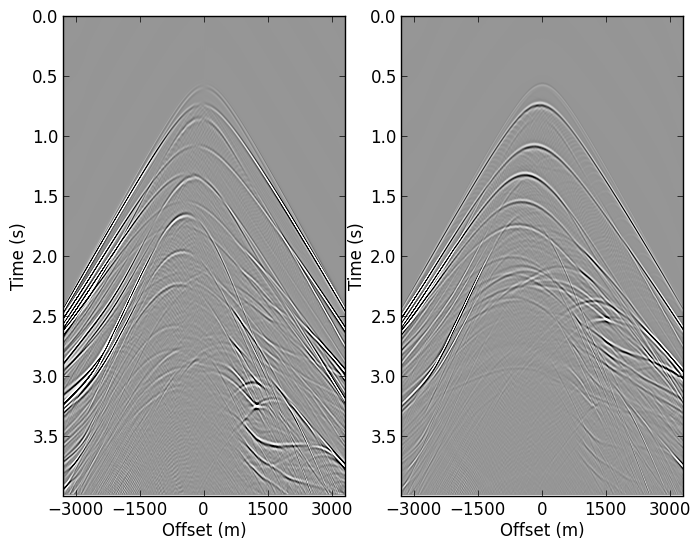

In [7]:
ux,h = SeisRead("ux");
uy,h = SeisRead("uy");
uz,h = SeisRead("uz");
plotpar = ["style"=>"color",
           "vmin"=>-0.007,"vmax"=>0.007,
           "aspect"=>"auto",
    "xlabel"=>"Offset","xunits"=>"(m)","ox"=>-3304.,"dx"=>8.,
           "ylabel"=>"Time","yunits"=>"(s)","oy"=>0.,"dy"=>dt,
           "wbox"=>8,"hbox"=>8,
    "cmap"=>"Greys"];
Seismic.subplot(121)
    SeisPlot(ux,plotpar);
    Seismic.xticks(vec([-3000:1500:3000]));
Seismic.subplot(122)
    SeisPlot(uz,plotpar);
    Seismic.xticks(vec([-3000:1500:3000]));

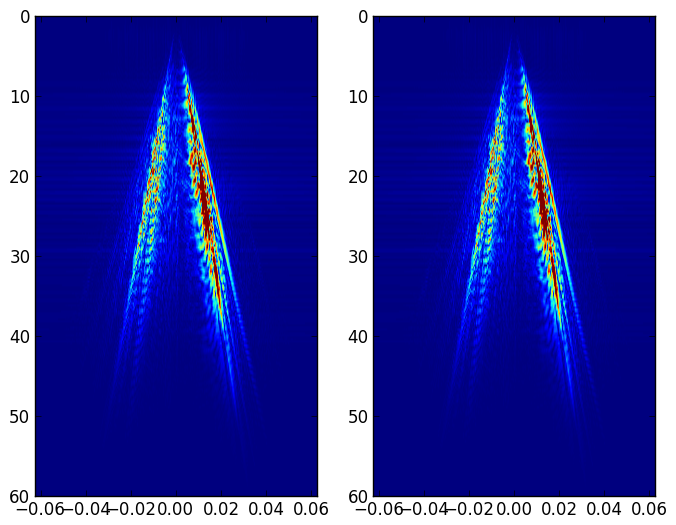

PyObject <matplotlib.image.AxesImage object at 0x132217450>

In [8]:
fmax=60;
dk = 1/dmx/size(ux,2)
kmin = -dk*size(ux,2)/2
kmax =  dk*size(ux,2)/2
df = 1/dt/size(ux,1)
FMAX = df*size(ux,1)/2 
nf = convert(Int32,floor((size(ux,1)/2)*fmax/FMAX))
Ux = abs(fftshift(fft(ux)))
Ux = Ux[end/2:end/2+nf,:]
Uz = abs(fftshift(fft(ux)))
Uz = Uz[end/2:end/2+nf,:]
Seismic.subplot(121)
Seismic.imshow(Ux,vmin=0,vmax=50,extent=[kmin,kmax,fmax,0],aspect="auto")
Seismic.subplot(122)
Seismic.imshow(Uz,vmin=0,vmax=50,extent=[kmin,kmax,fmax,0],aspect="auto")

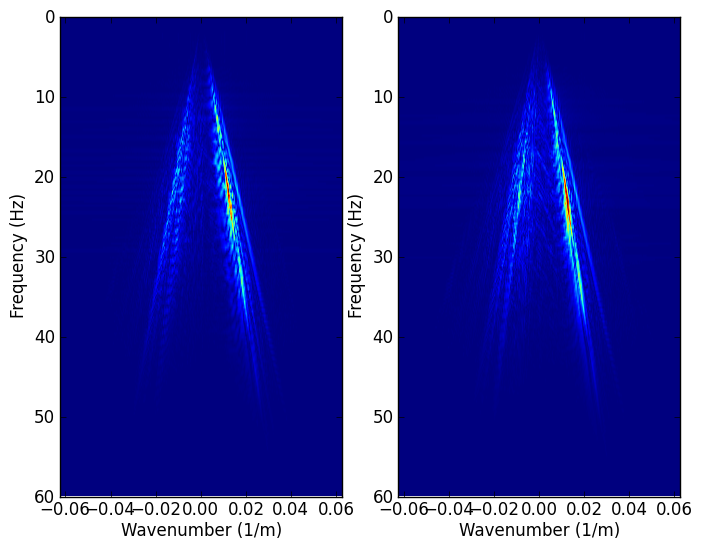

In [9]:
plotpar_FK = ["dx"=>8.,"dy"=>dt,"cmap"=>"jet","fmax"=>60];
Seismic.subplot(121)
SeisPlotFKSpectrum(ux,plotpar_FK);
Seismic.subplot(122)
SeisPlotFKSpectrum(uz,plotpar_FK);

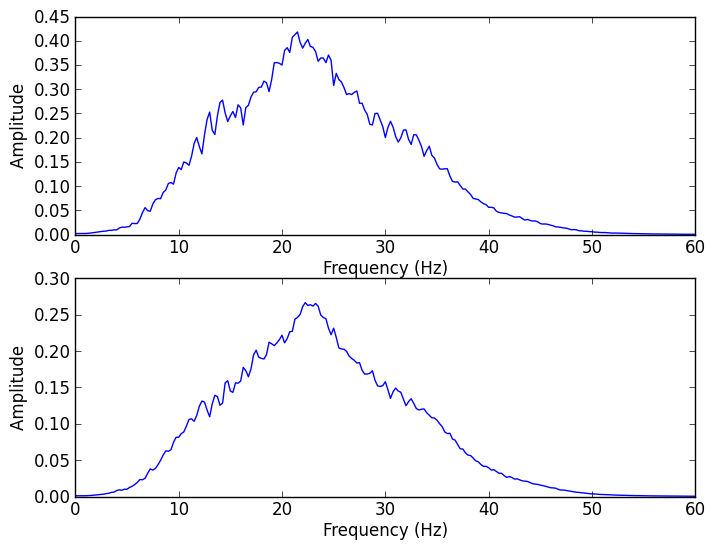

In [10]:
plotpar_amp = ["dy"=>dt,"fmax"=>60];
Seismic.subplot(211)
SeisPlotAmplitudeSpectrum(ux,plotpar_amp);
Seismic.subplot(212)
SeisPlotAmplitudeSpectrum(uz,plotpar_amp);

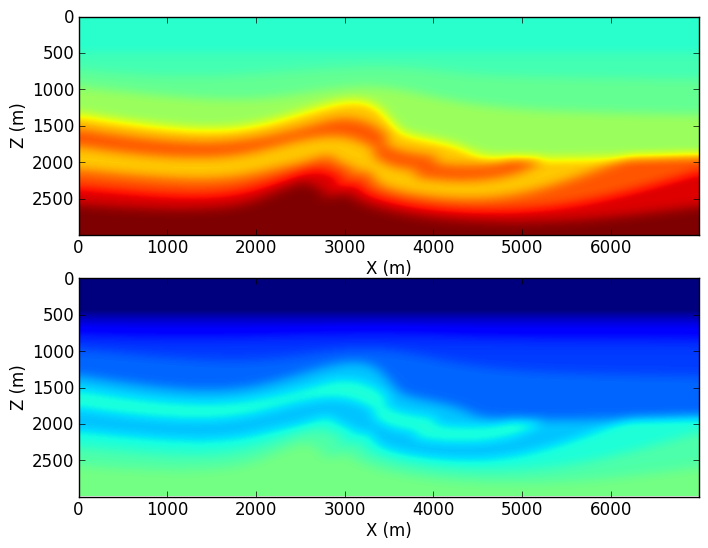

In [11]:
vp,h = SeisRead("vp");
vs,h = SeisRead("vs");
plotpar_vel = ["style"=>"color",
           "vmin"=>500,"vmax"=>3000,
           "aspect"=>"auto",
           "xlabel"=>"X","xunits"=>"(m)","ox"=>0.,"dx"=>8.,
           "ylabel"=>"Z","yunits"=>"(m)","oy"=>0.,"dy"=>dz,
           "wbox"=>8,"hbox"=>8,
           "cmap"=>"jet"];
Seismic.subplot(211)
    SeisPlot(vp,plotpar_vel);
Seismic.subplot(212)
    SeisPlot(vs,plotpar_vel);


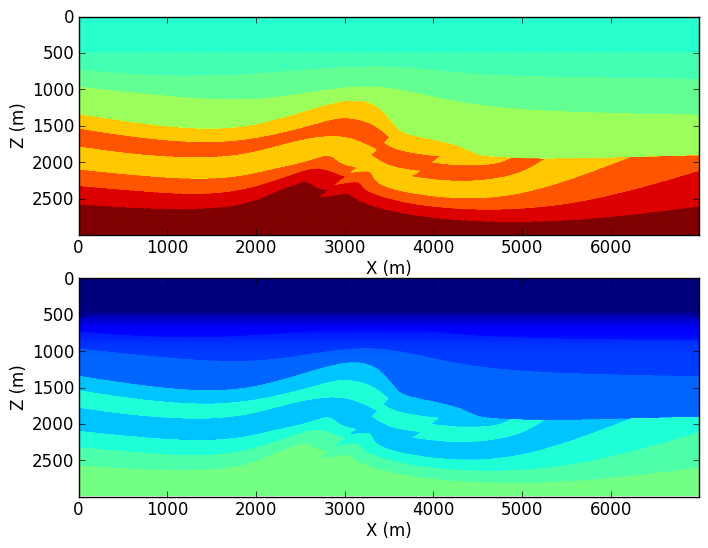

In [12]:
vp_raw,h = SeisRead("vp_raw");
vs_raw,h = SeisRead("vs_raw");
plotpar_vel = ["style"=>"color",
           "vmin"=>500,"vmax"=>3000,
           "aspect"=>"auto",
           "xlabel"=>"X","xunits"=>"(m)","ox"=>0.,"dx"=>8.,
           "ylabel"=>"Z","yunits"=>"(m)","oy"=>0.,"dy"=>dz,
           "wbox"=>8,"hbox"=>8,
           "cmap"=>"jet"];
Seismic.subplot(211)
    SeisPlot(vp_raw,plotpar_vel);
Seismic.subplot(212)
    SeisPlot(vs_raw,plotpar_vel);

In [5]:
# compute reflector normals 
vp_raw,h = SeisRead("vp_raw");
coh,pp,res = SeisPWD(vp_raw,["w1"=>30,"w2"=>30,"dx"=>8,"dz"=>4]);
SeisWrite("dipx",pp,h);
SeisWrite("dipy",pp*0,h);

Figure(PyObject <matplotlib.figure.Figure object at 0x123ffc3d0>)

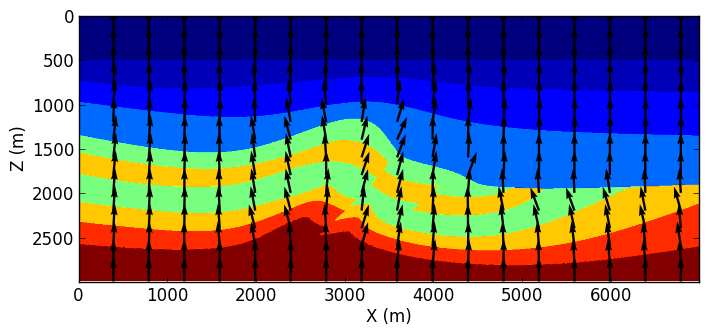

In [6]:
# plot reflector normals over P-wave velocity model
plotpar = ["style"=>"color",
    "vmin"=>1500,"vmax"=>3000,"aspect"=>1,
    "xlabel"=>"X","xunits"=>"(m)","ox"=>0.,"dx"=>8.,
    "ylabel"=>"Z","yunits"=>"(m)","oy"=>0.,"dy"=>4.,
    "cmap"=>"jet"];
SeisPlot(vp_raw,plotpar); 
Seismic.hold("true");
L = 1;
pp_x = cos((pp[50:50:end,50:50:end]-90)*pi/180)*L;
pp_y = sin((pp[50:50:end,50:50:end]-90)*pi/180)*L;
Seismic.quiver([49:50:size(pp,2)-1]*8,[49:50:size(pp,1)-1]*h[1].d1,
pp_x, pp_y,angles="xy",scale=25,color="black");

In [7]:
# compute P and S wave angles wrt reflector normal
param = ["vp"=>"vp", "vs"=>"vs", "wav"=>"wav",
    "dip_flag"=>"y","dipx"=>"dipx","dipy"=>"dipy",
    "sz"=>10,"fmin"=>20., "fmax"=>30.,
    "nhx"=>827, "ohx"=>-3304, "dhx"=>8,
    "nhy"=>1, "ohy"=>0, "dhy"=>8,
    "omp"=>8,"verbose"=>"y"];
param["sx"] = [5100.0:100.0:5100.0];
param["sy"] = [5100.0:100.0:5100.0]*0;
ComputeElasticAngles("angpx","angpy","angsx","angsy",param);

[ 97.56% complete]      


Figure(PyObject <matplotlib.figure.Figure object at 0x110f8fc10>)

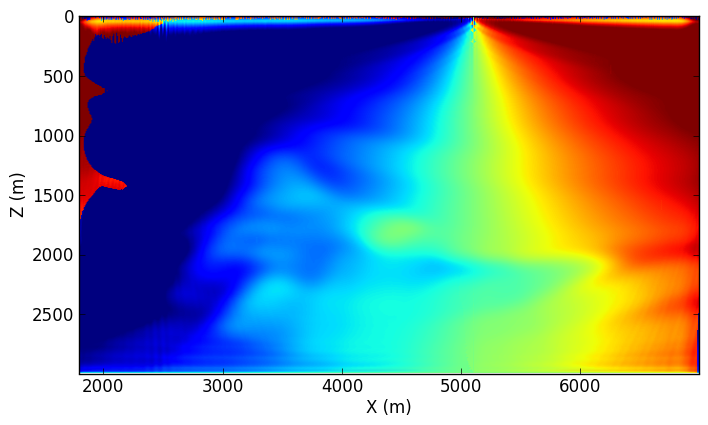

In [8]:
SeisWindow("angpx","angpx_1shot",["sx"],[5100],[5100]);
SeisWindow("angpy","angpy_1shot",["sx"],[5100],[5100]);
angpx,h = SeisRead("angpx_1shot");
angpy,h = SeisRead("angpy_1shot");
plotpar["vmin"]=-70; plotpar["vmax"]=70;plotpar["ox"]=h[1].mx
SeisPlot(angpx,plotpar);

Figure(PyObject <matplotlib.figure.Figure object at 0x106fe2e50>)

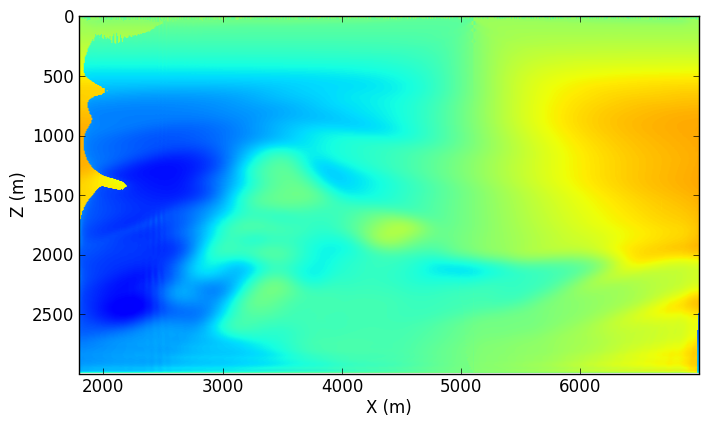

In [9]:
SeisWindow("angsx","angsx_1shot",["sx"],[5100],[5100]);
SeisWindow("angsy","angsy_1shot",["sx"],[5100],[5100]);
angsx,h = SeisRead("angsx_1shot");
angsy,h = SeisRead("angsy_1shot");
plotpar["vmin"]=-70; plotpar["vmax"]=70;plotpar["ox"]=h[1].mx
SeisPlot(angsx,plotpar);